In [70]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#The code below will retrieve the dataset into a pandas dataframe
file="8606-subtopics_Clean.csv"


df1=pd.read_csv(file)


df1

,Question,Answer,topic_name,topic_words,Unnamed: 4
0,What were the sources of atmospheric nutrients...,The primary sources of atmospheric nutrients t...,Bio-Fishery Ecosys.,"fisheries, fishing, zooplankton, bioclimatic, ...",NaN
1,How was the fertilization effect on phytoplank...,The fertilization effect on phytoplankton was ...,Bio-Fishery Ecosys.,"fisheries, fishing, zooplankton, bioclimatic, ...",NaN
2,How do rising temperatures affect Alpine lakes?,Rising temperatures increase mineral weatherin...,Bio-Fishery Ecosys.,"fisheries, fishing, zooplankton, bioclimatic, ...",NaN
3,How has an increase in phytoplankton biomass b...,Significant increase in phytoplankton biomass ...,Bio-Fishery Ecosys.,"fisheries, fishing, zooplankton, bioclimatic, ...",NaN
4,How do higher metabolic rates of organisms and...,Higher metabolic rates of organisms and longer...,Climatological Vegetation,"vegetation, plants, climatological, planting, ...",NaN
...,...,...,...,...,...
8490,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN
8492,NaN,NaN,NaN,NaN,NaN
8493,NaN,NaN,NaN,NaN,NaN


In [57]:
ques=df1[["Answer","Question"]]

ques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Answer    8479 non-null   object
 1   Question  8479 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [58]:
qu=ques.dropna() # Drop Nans rows

qu.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 8479 entries, 0 to 8478
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Answer    8479 non-null   object
 1   Question  8479 non-null   object
dtypes: object(2)
memory usage: 198.7+ KB


In [59]:
import string
#Remove puntuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [60]:
# We will combine question and answers into one column
# and create embedding from it
# Note there are other ways to do this, eg take question and answer seperatly,
# Use only one of the columns
# But for the first iteration of the model we will use both columns combined
# No stopwords as stopwords can have importance in this problem
# No lemmatization in this iteration but can be tried in next iteration

qu["Question"] = qu["Question"].apply(remove_punctuations) # Remove puntuation
qu["Answer"] = qu["Answer"].apply(remove_punctuations)
qu["new"]= qu["Question"] +" "+ qu["Answer"]

qu.iloc[0]

Answer      The primary sources of atmospheric nutrients t...
Question    What were the sources of atmospheric nutrients...
new         What were the sources of atmospheric nutrients...
Name: 0, dtype: object

In [61]:
qu["new"]=qu["new"].str.lower() #Lower the words

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#Use TF-IDF to to vectorize the column
documents = qu["new"].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

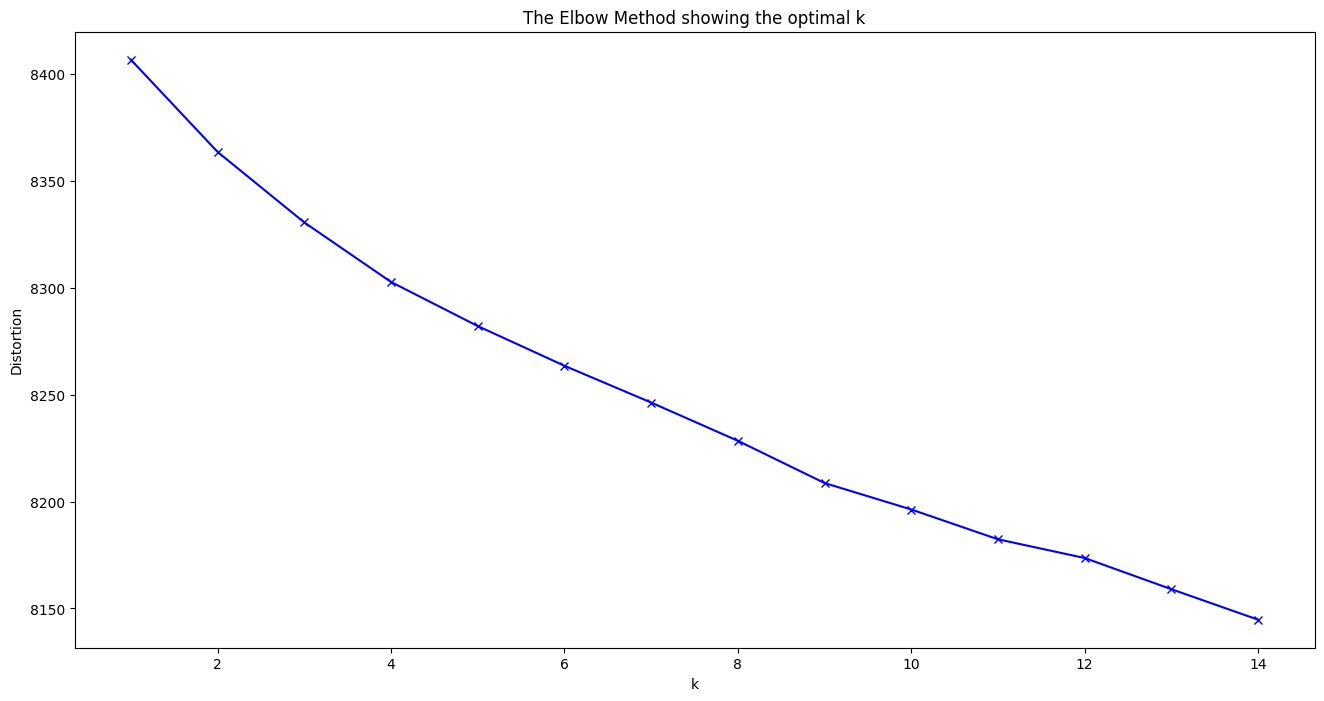

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow method 12 seems to be good number of clusters. Various other clusters were tried and 12 produced the most meaningful ones

In [64]:
#K means with 12 clusters
k = 12
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)

model.fit(features)

KMeans(max_iter=100, n_clusters=12, n_init=1)

In [65]:
from sklearn.metrics import silhouette_score


#
model.fit_predict(features)
#
# Calculate Silhoutte Score
#
score = silhouette_score(features, km.labels_)
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.008


The Silhoutte score is 0.008.

In [66]:
qu["cluster"]=model.labels_

In [69]:
# This gives the clusters and corresponding words

common_words = model.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print("\n")
    print(str(num) + ' : ' + ', '.join(terms[word] for word in centroid))



0 : research, conducted, paper, energy, purpose, main, focus, objective, study, climate, als, aim, funding, cooling, discussed, et, eahx, change, used, 2021, topic, buildings, different, published, type


1 : energy, renewable, consumption, efficiency, demand, sources, systems, used, buildings, sector, solar, heating, thermal, economic, supply, main, use, models, wind, does, savings, impact, reduce, analysis, production


2 : study, used, purpose, energy, als, focus, area, climate, main, case, aim, conducted, et, vegetation, did, change, considered, results, factors, journal, thermal, published, soil, findings, examine


3 : temperature, used, average, pv, water, emissions, does, heat, carbon, cooling, increase, power, soil, scenario, rate, efficiency, co2, thermal, air, area, vegetation, solar, precipitation, purpose, performance


4 : model, used, energy, adaptive, japanese, models, variables, using, purpose, demand, does, constraints, simulation, comfort, time, data, proposed, dev

Clusters:
 - 0 = Strategy and Management
 - 1 = Ethics and Regulation
 - 2 = Analysis
 - 3 = Strategy and Management
 - 4 = Strategy and Management
 - 5 = Ethics and Regulation
 - 6 = Strategy and Management
 - 7 = Analysis 
 - 8 = Analysis
 - 9 = Ethics and Regulation
 - 10 = Ethics and Regulation
 - 11 = Analysis
 
 
 

Note all these clusters contain Science and Tech words